<a href="https://colab.research.google.com/github/Maucho6340/Telecom_X_LATAM_Predict/blob/main/Challenge_predict_evasion_op1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'> CHALLENGE TELECOM X:
**Análisis de evasión de clientes Parte-2**

## **MISIÓN**



Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

## **OBJETIVOS DEL DESAFÍO**



- Preparar los datos para el modelado (tratamiento, codificación, normalización).

- Realizar análisis de correlación y selección de variables.

- Entrenar dos o más modelos de clasificación.

- Evaluar el rendimiento de los modelos con métricas.

- Interpretar los resultados, incluyendo la importancia de las variables.

- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

## **DESARROLLO**

### **Verificar versiones de bibliotecas**

In [25]:
import pandas, numpy, matplotlib, seaborn, sklearn, scipy #scipy
print('Versión de Pandas: %s' % pandas.__version__)
print('Versión de Numpy: %s' % numpy.__version__)
print('Versión de Matplotlib: %s' % matplotlib.__version__)
print('Versión de Seaborn: %s' % seaborn.__version__)
print('Versión de Sklearn: %s' % sklearn.__version__)
print('Versión de Scipy: %s' % scipy.__version__)

Versión de Pandas: 2.2.2
Versión de Numpy: 2.0.2
Versión de Matplotlib: 3.10.0
Versión de Seaborn: 0.13.2
Versión de Sklearn: 1.6.1
Versión de Scipy: 1.16.1


### **Cargar archivo**

In [26]:
import pandas as pd

# Cargar archivo CSV
df_final = pd.read_csv("/content/df_predict_churn_2.csv")

# Vista rápida de los primeros registros
df_final.head(5)

,ID_Cliente,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Facturacion_Mensual,account.Charges.Total,Cuentas_Diarias,Churn_bin,Churn_num
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,0.0,0.0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,0.0,0.0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fibra Óptica,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1.0,1.0
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fibra Óptica,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,1.0,1.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fibra Óptica,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,1.0,1.0


In [27]:
#
#
#
# Renombrar columnas que contienen 'Churn' por 'Chrun'
df_final.columns = [
    col.replace('Churn', 'Chrun') if 'Churn' in col else col
    for col in df_final.columns
]

# Verificar el cambio
print(df_final.columns[df_final.columns.str.contains('Chrun')])
#
#
#
#

Index(['Chrun', 'Chrun_bin', 'Chrun_num'], dtype='object')


In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Cliente                 7267 non-null   object 
 1   Chrun                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

En este caso, como el objetivo es predecir si un cliente va a cancelar o no el servicio, estamos trabajando con una variable categórica (churn: sí o no). Por eso, los modelos adecuados son los de clasificación, como DecisionTreeClassifier o KNeighborsClassifier

In [29]:
df_final.sample(5)

,ID_Cliente,Chrun,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Facturacion_Mensual,account.Charges.Total,Cuentas_Diarias,Chrun_bin,Chrun_num
2517,3518-FSTWG,No,Male,1,Yes,No,72,Yes,Yes,Fibra Óptica,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.55,7920.70,3.651667,0.0,0.0
3139,4374-YMUSQ,No,Male,0,No,No,34,Yes,Yes,Fibra Óptica,...,Yes,Yes,One year,No,Credit card (automatic),116.25,3899.05,3.875000,0.0,0.0
5165,7048-GXDAY,No,Male,0,No,No,39,Yes,Yes,Fibra Óptica,...,Yes,Yes,Month-to-month,Yes,Electronic check,106.40,4040.65,3.546667,0.0,0.0
5675,7754-IXRMC,No,Female,0,No,No,1,Yes,No,DSL,...,No,No,Month-to-month,No,Mailed check,45.35,45.35,1.511667,0.0,0.0
2827,3920-HIHMQ,No,Female,0,No,Yes,26,Yes,Yes,DSL,...,No,No,Month-to-month,Yes,Mailed check,49.50,1265.65,1.650000,0.0,0.0


### <font color='blue'>**1.- Preparar los datos para el modelado (tratamiento, codificación, normalización)**.

##### **Tratamiento de valores nulos**

In [30]:
# Imputar con mediana en 'account.Charges.Total' — versión segura
df_final['account.Charges.Total'] = df_final['account.Charges.Total'].fillna(df_final['account.Charges.Total'].median())

# Eliminar filas sin datos en la variable objetivo
df_final.dropna(subset=['Chrun_bin', 'Chrun_num'], inplace=True)

##### **Codificación de Variables Categórica**

In [31]:
# Elimina columna ID_Cliente o l ignora si ya no existe
df_final.drop(columns=['ID_Cliente'], inplace=True, errors='ignore')

# Codificación con pd.get_dummies
columnas_categoricas = df_final.select_dtypes(include='object').columns

df_final = pd.get_dummies(df_final, columns=columnas_categoricas, drop_first=True)

##### **Verificación final del DataFram**

In [32]:
# Confirmar que no quedan datos nulos ni columnas tipo object
print(df_final.isnull().sum())
print(df_final.dtypes)

customer.SeniorCitizen                           0
customer.tenure                                  0
Facturacion_Mensual                              0
account.Charges.Total                            0
Cuentas_Diarias                                  0
Chrun_bin                                        0
Chrun_num                                        0
Chrun_Yes                                        0
customer.gender_Male                             0
customer.Partner_Yes                             0
customer.Dependents_Yes                          0
phone.PhoneService_Yes                           0
phone.MultipleLines_No phone service             0
phone.MultipleLines_Yes                          0
internet.InternetService_Fibra Óptica            0
internet.InternetService_Sin Servicio            0
internet.OnlineSecurity_No internet service      0
internet.OnlineSecurity_Yes                      0
internet.OnlineBackup_No internet service        0
internet.OnlineBackup_Yes      

#### **Resumen 1a Etapa**

Esta etapa se centró en garantizar la calidad, consistencia y estructura adecuada del dataset para su uso en modelos de machine learning.

##### Acciones realizadas:

- **Carga del archivo**: Se verificó la estructura del DataFrame, compuesto por 7,267 registros y 24 columnas.
- **Tratamiento de valores nulos**: Se imputaron o eliminaron valores faltantes, especialmente en `account.Charges.Total`, `Churn_bin` y `Churn_num`.
- **Codificación de variables categóricas**: Se aplicó One-Hot Encoding a variables como género, tipo de contrato, servicios de internet, método de pago, etc.
- **Verificación final del DataFrame**:
  - Todas las variables relevantes quedaron sin valores nulos.
  - Las variables booleanas fueron correctamente codificadas como `bool`.
  - Las variables numéricas (`customer.tenure`, `Facturacion_Mensual`, `account.Charges.Total`, `Cuentas_Diarias`) quedaron listas para análisis estadístico.



**Conclusión de la Etapa**<br>

Se completó exitosamente la etapa de exploración y limpieza del conjunto de datos, abordando valores faltantes, inconsistencias y codificación de variables categóricas. Este proceso permitió establecer una base estructurada y confiable para el análisis posterior. Las decisiones tomadas se documentaron cuidadosamente, priorizando la reproducibilidad y la trazabilidad del flujo de trabajo. El dataset resultante presenta una estructura coherente, libre de anomalías críticas, y está listo para avanzar hacia la selección de variables relevantes.

### <font color='blue'>**2.- Realizar análisis de correlación y selección de variables**.

##### **Análisis de correlación numérica**

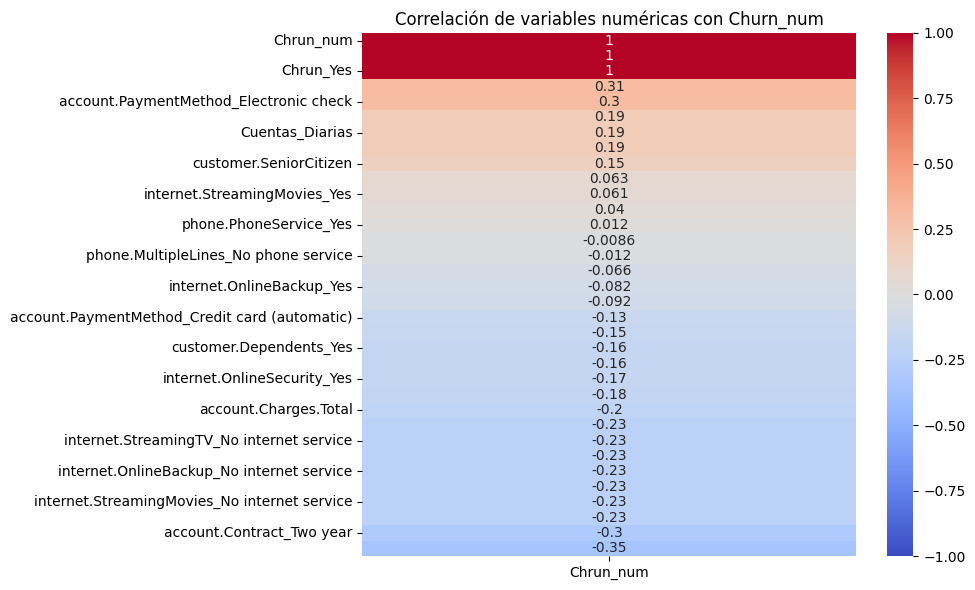

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlación de variables numéricas
correlaciones = df_final.corr(numeric_only=True)

# Visualizar correlación con la variable objetivo
plt.figure(figsize=(10, 6))
sns.heatmap(correlaciones[['Chrun_num']].sort_values(by='Chrun_num', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlación de variables numéricas con Churn_num")
plt.tight_layout()
plt.show()

##### **Análisis de Importancia para Variables Booleana**

/tmp/ipython-input-1173703578.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias_ordenadas[:15], y=importancias_ordenadas.index[:15], palette='viridis')


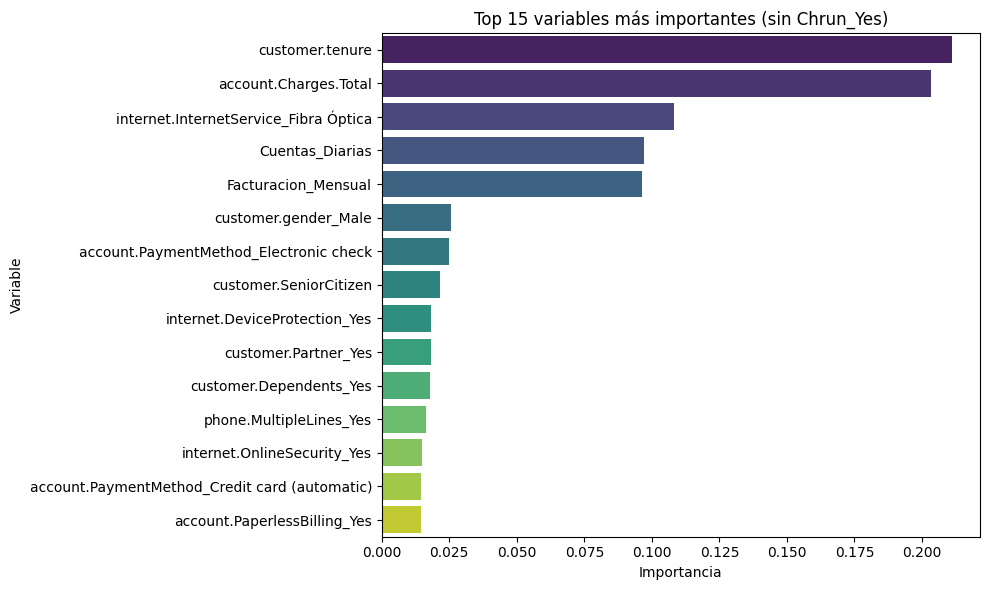

In [34]:
from sklearn.tree import DecisionTreeClassifier
X = df_final.drop(columns=['Chrun_bin', 'Chrun_num', 'Chrun_Yes'])  # excluimos el target y su duplicado
y = df_final['Chrun_bin']  # o 'Churn_num' según tu criterio

modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X, y)

importancias = pd.Series(modelo_arbol.feature_importances_, index=X.columns)
importancias_ordenadas = importancias.sort_values(ascending=False)

# Visualizamos nuevamente
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=importancias_ordenadas[:15], y=importancias_ordenadas.index[:15], palette='viridis')
plt.title("Top 15 variables más importantes (sin Chrun_Yes)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

Variables Predictivas Seleccionadas para el Modelo **DecisionTreeClassifier**

| Variable                                  | Descripción y Justificación |
|--------------------------------------------|------------------------------|
| `customer.tenure`                          | Antigüedad del cliente; menor permanencia se asocia a mayor churn. |
| `account.Charges.Total`                    | Total facturado; refleja exposición financiera acumulada. |
| `internet.InternetService_Fibra Óptica`    | Este tipo de servicio está correlacionado con mayor abandono. |
| `Cuentas_Diarias`                          | Actividad operativa diaria; puede influir en la permanencia. |
| `Facturacion_Mensual`                      | Costo mensual del servicio; niveles altos pueden generar abandono. |
| `customer.SeniorCitizen`                   | Grupo demográfico con patrones de churn distintos. |
| `account.PaymentMethod_Electronic check`   | Método de pago vinculado a mayor volatilidad de permanencia. |
| `account.Contract_Two year`                | Contrato largo suele estar ligado a menor churn. |
| `internet.OnlineSecurity_Yes`              | Servicios adicionales pueden aumentar la percepción de valor. |
| `phone.MultipleLines_Yes`                  | Presencia de líneas múltiples podría asociarse a mayor complejidad o costos. |

##### **Análisis de Multicolinealidad con VIF**

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Usamos df_final directamente con las variables seleccionadas
X = df_final[['customer.tenure', 'account.Charges.Total', 'Cuentas_Diarias', 'Facturacion_Mensual']]
X_const = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]

print(vif_data)

                Variable       VIF
0        customer.tenure  5.769597
1  account.Charges.Total  9.395018
2        Cuentas_Diarias       inf
3    Facturacion_Mensual       inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


##### **Visualización de correlaciones cruzadas**

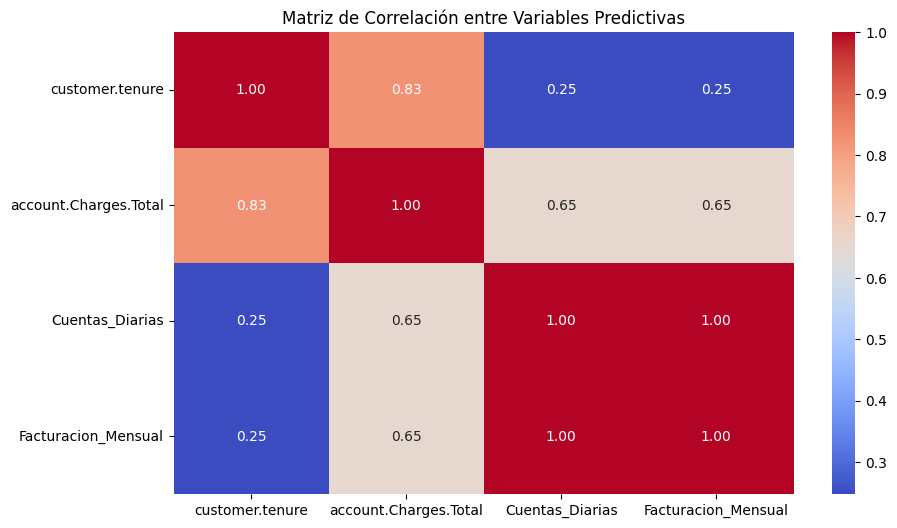

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Predictivas")
plt.show()

##### **Comparación con otras técnicas de selección automática**

<u>Recursive Feature Elimination (RFE)</u>

In [37]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Variables seleccionadas por RFE:", selected_features.tolist())

Variables seleccionadas por RFE: ['customer.tenure', 'account.Charges.Total', 'Cuentas_Diarias', 'Facturacion_Mensual']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=4. There will be no feature selection and all features will be kept.
  warnings.warn(


<u>SelectFromModel</u>

In [38]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model)
sfm.fit(X, y)

selected_features_sfm = X.columns[sfm.get_support()]
print("Variables seleccionadas por SelectFromModel:", selected_features_sfm.tolist())

Variables seleccionadas por SelectFromModel: ['account.Charges.Total']


##### **Resumen Etapa 2**

Esta etapa tuvo como objetivo identificar las variables más relevantes para la predicción de chrun, reducir la dimensionalidad y evitar redundancias.

### Análisis de correlación numérica

Se exploraron relaciones entre variables continuas. Se detectó una correlación casi perfecta entre `Facturacion_Mensual` y `Cuentas_Diarias`, lo que sugiere redundancia informativa.

### Análisis de importancia para variables booleanas

Se entrenó un `DecisionTreeClassifier` para obtener la importancia relativa de las variables categóricas codificadas. Se visualizaron las 15 variables más influyentes en la predicción de chrun.

### Análisis de multicolinealidad con VIF

Se calculó el **Factor de Inflación de Varianza (VIF)** para las variables numéricas seleccionadas:

| Variable                | VIF        | Interpretación                        |
|------------------------|------------|---------------------------------------|
| `customer.tenure`      | 5.77       | Aceptable                             |
| `account.Charges.Total`| 9.40       | Alta multicolinealidad                |
| `Cuentas_Diarias`      | ∞          | Multicolinealidad extrema             |
| `Facturacion_Mensual`  | ∞          | Multicolinealidad extrema             |

Este análisis confirmó la necesidad de revisar la inclusión simultánea de Facturacion_Mensual y Cuentas_Diarias en modelos sensibles a colinealidad.
Los valores de VIF tienden a infinito debido a la correlación perfecta entre ambas variables (coeficiente de correlación = 1.00).


### 🔹 Visualización de correlaciones cruzadas

Se generaron heatmaps para variables categóricas codificadas y variables numéricas, lo que permitió validar visualmente las relaciones detectadas por VIF y el árbol de decisión.

### 🔹 Comparación con técnicas de selección automática

Se aplicaron dos métodos complementarios:

- **RFE (Recursive Feature Elimination)**: Seleccionó las siguientes variables:
  ```python
  ['customer.tenure', 'account.Charges.Total', 'Cuentas_Diarias', 'Facturacion_Mensual']
- **'SelectFromModel'**: Seleccionó la siguiente variable:
   ['account.Charges.Total']

**Conclusión de la Etapa**<br>

Se consolidó un conjunto de cuatro variables altamente relevantes para el modelado, seleccionadas mediante técnicas automáticas y análisis interpretativo. Aunque se detectó multicolinealidad entre dos de ellas, se decidió mantenerlas temporalmente para evaluar su impacto en el rendimiento de los modelos en la siguiente etapa. La convergencia entre métodos como RFE, SelectFromModel y el análisis de importancia del árbol de decisión aporta solidez y confianza al proceso de preparación


### <font color='blue'>**3.- Entrenar dos o más modelos de clasificación**.

In [69]:
# 📦 Importar librerías
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 🎯 División inicial del dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ⚖️ Rebalanceo con SMOTE (solo sobre el conjunto de entrenamiento)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 📏 Escalado de variables
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)  # Solo transformamos, no fit

# 🔁 Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 🧪 Definición de modelos
modelo_lr = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000, random_state=42)
modelo_rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# 📊 Validación cruzada con F1-score
scores_lr = cross_val_score(modelo_lr, X_train_res_scaled, y_train_res, cv=cv, scoring='f1')
scores_rf = cross_val_score(modelo_rf, X_train_res_scaled, y_train_res, cv=cv, scoring='f1')

# 📈 Resultados
print("F1-score promedio (Logistic Regression):", scores_lr.mean())
print("F1-score promedio (Random Forest):", scores_rf.mean())

F1-score promedio (Logistic Regression): 0.8328808393600422
F1-score promedio (Random Forest): 0.8499441424669371


### <font color='blue'>**4.- Evaluación del redimiento de los modelos**.

##### valuación sobre X_test_scaled y y_test
Importar métrica


In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

##### Entrenar modelos finales sobre todo el conjunto rebalanceado

In [71]:
# Entrenar sobre todo el conjunto rebalanceado y escalado
modelo_lr.fit(X_train_res_scaled, y_train_res)
modelo_rf.fit(X_train_res_scaled, y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

##### Predicciones sobre el conjunto de prueba

In [72]:
y_pred_lr = modelo_lr.predict(X_test_scaled)
y_pred_rf = modelo_rf.predict(X_test_scaled)

##### Métricas para cada molo

In [74]:
def evaluar_modelo(y_true, y_pred, nombre):
    print(f"\nEvaluación para {nombre}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Matriz de confusión:\n", confusion_matrix(y_true, y_pred))
    print("Reporte de clasificación:\n", classification_report(y_true, y_pred))

# Evaluar ambos modelos
evaluar_modelo(y_test, y_pred_lr, "Logistic Regression")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")


Evaluación para Logistic Regression
Accuracy: 0.7743080198722498
Precision: 0.5689655172413793
Recall: 0.6176470588235294
F1-score: 0.5923076923076923
Matriz de confusión:
 [[860 175]
 [143 231]]
Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      1035
         1.0       0.57      0.62      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.77      0.78      1409


Evaluación para Random Forest
Accuracy: 0.7700496806245565
Precision: 0.5651041666666666
Recall: 0.5802139037433155
F1-score: 0.5725593667546174
Matriz de confusión:
 [[868 167]
 [157 217]]
Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.85      0.84      0.84      1035
         1.0       0.57      0.58      0.57       374

    accuracy                           0.77      1409
   macro avg 

**Interpretación técnica**<br>
Ambos modelos tienen rendimiento similar, con una ligera ventaja para Logistic Regression en todas las métricas.<br>
La clase minoritaria (churn) tiene métricas moderadas:
+ Precision ≈ 0.57–0.59 → el modelo acierta en ~57% de los casos que predice como churn.
+ Recall ≈ 0.58–0.62 → el modelo detecta ~60% de los churn reales.<br>

La matriz de confusión muestra que hay falsos negativos y falsos positivos, pero no extremos.


- Los modelos no están sobreajustados: el rendimiento en test es coherente con la validación cruzada.
- El rebalanceo con SMOTE ayudó a mejorar la sensibilidad hacia la clase minoritaria.
- Aún hay espacio para mejorar recall sin sacrificar demasiado la precisión
- - -

### <font color='blue'>**5.- Interpretar los resultados, incluyendo la importancia de las variables**.

##### Importancia de variables en Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# Entrenar modelo
logreg_model_final = LogisticRegression(max_iter=1000, random_state=42)
logreg_model_final.fit(X_train_resampled, y_train_resampled)

# Extraer coeficientes
coefficients = logreg_model_final.coef_[0]
feature_names = X_train_resampled.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values(by='Abs_Coefficient', ascending=False)

# Mostrar top 10
coef_df.head(10)

,Feature,Coefficient,Abs_Coefficient
1,customer.tenure,-1.581914,1.581914
3,account.Charges.Total,0.865453,0.865453
11,internet.InternetService_Fibra Óptica,0.807261,0.807261
26,account.Contract_Two year,-0.631468,0.631468
2,Facturacion_Mensual,-0.594260,0.594260
4,Cuentas_Diarias,-0.594260,0.594260
25,account.Contract_One year,-0.287498,0.287498
22,internet.StreamingTV_Yes,0.286415,0.286415
24,internet.StreamingMovies_Yes,0.256108,0.256108
10,phone.MultipleLines_Yes,0.233091,0.233091


##### Importancia de variables en Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar modelo
rf_model_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_final.fit(X_train_resampled, y_train_resampled)

# Extraer importancia
rf_importances = rf_model_final.feature_importances_
feature_names = X_train_resampled.columns

rf_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Mostrar top 10
rf_df.head(10)

,Feature,Importance
1,customer.tenure,0.152338
3,account.Charges.Total,0.128153
4,Cuentas_Diarias,0.096800
2,Facturacion_Mensual,0.095489
26,account.Contract_Two year,0.062647
29,account.PaymentMethod_Electronic check,0.041713
11,internet.InternetService_Fibra Óptica,0.040516
27,account.PaperlessBilling_Yes,0.034448
25,account.Contract_One year,0.032183
20,internet.TechSupport_Yes,0.028672


- Hay consistencia con Logistic Regression: tenure, Charges.Total, Contract_Two year, Facturacion_Mensual, InternetService_Fibra Óptica aparecen en ambos modelos como relevantes.
- Random Forest no indica dirección (positivo/negativo), pero confirma la importancia estructural de estas variables.


##### Comparativa top 10: Logistic Regression vs Random Forest

| Variable                                 | LR: Coeficiente | RF: Importancia | Coinciden | Interpretación clave                          |
|------------------------------------------|------------------|------------------|-----------|------------------------------------------------|
| customer.tenure                          | -1.58            | 0.152            | ✅        | Más antigüedad, menos churn                    |
| account.Charges.Total                    | +0.87            | 0.128            | ✅        | Cargos altos → más churn                       |
| internet.InternetService_Fibra Óptica    | +0.81            | 0.041            | ✅        | Fibra óptica → más churn                       |
| account.Contract_Two year                | -0.63            | 0.063            | ✅        | Contrato largo → retención                     |
| Facturacion_Mensual                      | -0.59            | 0.095            | ✅        | Menor facturación → menos churn                |
| Cuentas_Diarias                          | -0.59            | 0.097            | ✅        | Más actividad → menos churn                    |
| account.Contract_One year                | -0.29            | 0.032            | ✅        | Contrato medio → retención                     |
| internet.StreamingTV_Yes                 | +0.29            | —                | ❌        | Streaming TV → más churn                       |
| internet.StreamingMovies_Yes             | +0.26            | —                | ❌        | Streaming Movies → más churn                   |
| phone.MultipleLines_Yes                  | +0.23            | —                | ❌        | Múltiples líneas → más churn                   |

Se evaluaron dos modelos predictivos de churn: Regresión Logística y Random Forest, con el objetivo de identificar las variables más influyentes en la decisión de abandono del cliente.
Ambos modelos coincidieron en destacar:
- Antigüedad del cliente (tenure)
- Cargos acumulados (Charges.Total)
- Tipo de contrato (Contract_Two year, Contract_One year)
- Facturación mensual
- Actividad diaria<br>

Estas variables deben considerarse prioritarias en estrategias de retención.<br>

La regresión logística aporta dirección (efecto positivo o negativo), mientras que Random Forest confirma la relevancia estructural de las variables. La consistencia entre modelos refuerza la confiabilidad de los hallazgos.


### <font color='blue'>**6.- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación**.

##### **a) <u>Conclusión estratégica sobre el churn**</u>

El análisis de modelos predictivos revela un conjunto claro de factores que influyen significativamente en la cancelación del servicio. Estos hallazgos permiten orientar acciones concretas para reducir el churn y mejorar la retención.



##### **b) <u>Principales factores asociados al churn**</u>

- **Baja antigüedad del cliente (`tenure`)**  
  Clientes nuevos presentan mayor riesgo de cancelación. Los primeros meses son críticos para establecer valor y fidelidad.

- **Altos cargos acumulados (`Charges.Total`)**  
  La percepción de costos elevados está fuertemente asociada al abandono. Es clave revisar políticas de facturación y comunicar beneficios.

- **Tipo de contrato**  
  Contratos de mayor duración (1 o 2 años) se asocian con menor churn. Incentivar compromisos a largo plazo puede ser efectivo.

- **Facturación mensual**  
  Menor facturación mensual se vincula con menor churn, posiblemente por percepción de accesibilidad o valor.

- **Nivel de actividad (`Cuentas_Diarias`)**  
  Clientes más activos tienden a permanecer. Fomentar el uso frecuente del servicio fortalece la relación.

- **Tipo de servicio contratado**  
  Servicios como fibra óptica y streaming se asocian con mayor churn. Es importante revisar la experiencia de usuario en estos segmentos.


##### **c) <u>Recomendación estratégica</u>**

Las acciones de retención deben centrarse en:

- Fortalecer la experiencia de los clientes nuevos.
- Ofrecer incentivos por contratos largos.
- Revisar la estructura de precios y cargos acumulados.
- Promover el uso activo del servicio.
- Monitorear segmentos con servicios premium para detectar fricciones.